In [1]:
import pandas as pd


In [2]:
import seaborn as sns

df = sns.load_dataset("titanic")


In [17]:
from google.colab import files
uploaded = files.upload()

Saving titanic dataset (1).zip to titanic dataset (1).zip


In [21]:
!unzip "titanic dataset (1).zip"


Archive:  titanic dataset (1).zip
  inflating: titanic dataset/gender_submission.csv  
  inflating: titanic dataset/test.csv  
  inflating: titanic dataset/train.csv  


In [22]:
df = pd.read_csv("titanic dataset/train.csv")

In [23]:
original_rows = df.shape[0]
print("Number of rows before removing duplicates:", original_rows)


Number of rows before removing duplicates: 891


In [24]:
duplicate_rows = df.duplicated()
print("Number of duplicate rows found:", duplicate_rows.sum())


Number of duplicate rows found: 0


In [25]:
df_cleaned = df.drop_duplicates()


In [26]:
cleaned_rows = df_cleaned.shape[0]
print("Number of rows after removing duplicates:", cleaned_rows)



Number of rows after removing duplicates: 891


In [27]:
print("Remaining duplicate rows:", df_cleaned.duplicated().sum())


Remaining duplicate rows: 0


In [28]:
df.isna().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [32]:
df = df.drop(columns=["Cabin"])


In [33]:
from sklearn.impute import SimpleImputer

age_imputer = SimpleImputer(strategy="median")
df["Age"] = age_imputer.fit_transform(df[["Age"]])


In [34]:
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])


In [35]:
df.isna().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [36]:
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1


In [37]:
df["Title"] = df["Name"].str.extract(r",\s*([^\.]+)\.", expand=False)


In [38]:
df["Title"].value_counts()


,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2


In [39]:
df["Title"] = df["Title"].replace(
    ["Lady", "Countess", "Capt", "Col", "Don", "Dr", "Major",
     "Rev", "Sir", "Jonkheer", "Dona"],
    "Rare"
)

df["Title"] = df["Title"].replace(
    {"Mlle": "Miss", "Ms": "Miss", "Mme": "Mrs"}
)


In [40]:
df = pd.get_dummies(df, columns=["Title"], drop_first=True)


In [41]:
df = pd.get_dummies(df, columns=["Sex", "Embarked"], drop_first=True)


In [42]:
df.head()
df.dtypes


,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64
FamilySize,int64


In [43]:
import matplotlib.pyplot as plt
import numpy as np


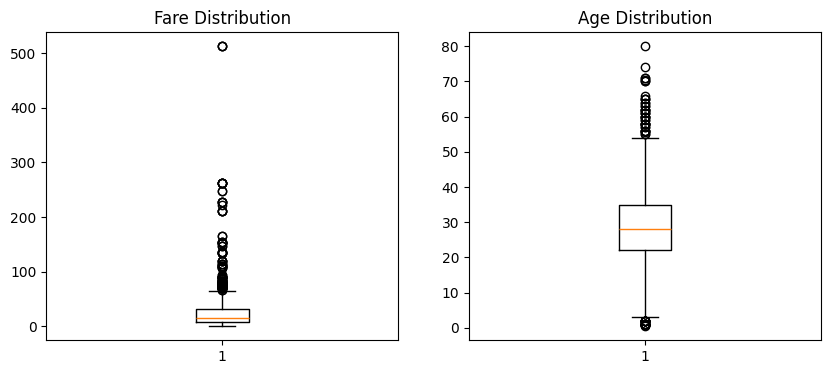

In [44]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.boxplot(df["Fare"])
plt.title("Fare Distribution")

plt.subplot(1,2,2)
plt.boxplot(df["Age"])
plt.title("Age Distribution")

plt.show()


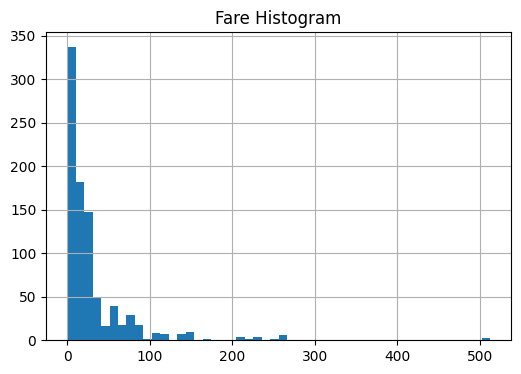

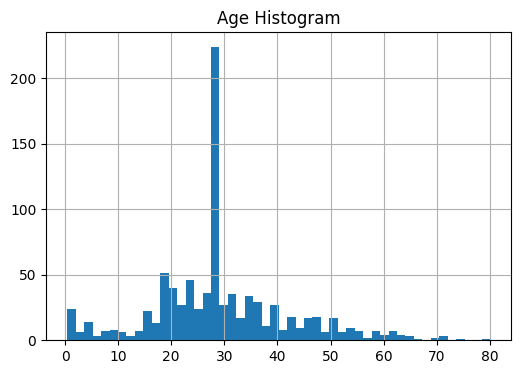

In [45]:
df["Fare"].hist(bins=50, figsize=(6,4))
plt.title("Fare Histogram")
plt.show()

df["Age"].hist(bins=50, figsize=(6,4))
plt.title("Age Histogram")
plt.show()


In [46]:
Q1_fare = df["Fare"].quantile(0.25)
Q3_fare = df["Fare"].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare

fare_lower = Q1_fare - 1.5 * IQR_fare
fare_upper = Q3_fare + 1.5 * IQR_fare

print("Fare outlier thresholds:", fare_lower, fare_upper)


Fare outlier thresholds: -26.724 65.6344


In [47]:
Q1_age = df["Age"].quantile(0.25)
Q3_age = df["Age"].quantile(0.75)
IQR_age = Q3_age - Q1_age

age_lower = Q1_age - 1.5 * IQR_age
age_upper = Q3_age + 1.5 * IQR_age

print("Age outlier thresholds:", age_lower, age_upper)


Age outlier thresholds: 2.5 54.5


In [48]:
fare_cap = df["Fare"].quantile(0.98)
age_cap = df["Age"].quantile(0.99)

df["Fare"] = df["Fare"].clip(upper=fare_cap)
df["Age"] = df["Age"].clip(upper=age_cap)


In [49]:
df["Fare_log"] = np.log1p(df["Fare"])


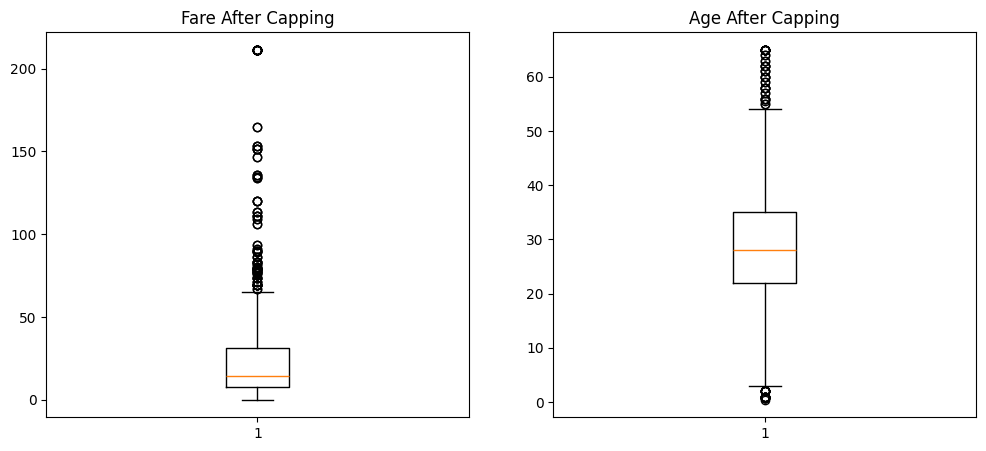

In [50]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.boxplot(df["Fare"])
plt.title("Fare After Capping")

plt.subplot(1,2,2)
plt.boxplot(df["Age"])
plt.title("Age After Capping")
plt.show()


In [51]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [52]:
df.select_dtypes(include=np.number).columns


Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'FamilySize', 'Fare_log'],
      dtype='object')

In [53]:
std_features = ["Age", "FamilySize"]  # roughly normal features
scaler = StandardScaler()
df[std_features] = scaler.fit_transform(df[std_features])


In [54]:
minmax_features = ["Fare", "Fare_log"]  # skewed / bounded
minmax_scaler = MinMaxScaler()
df[minmax_features] = minmax_scaler.fit_transform(df[minmax_features])


In [55]:
df[std_features + minmax_features].describe()


,Age,FamilySize,Fare,Fare_log
count,8.910000e+02,8.910000e+02,891.000000,891.000000
mean,5.980999e-17,-2.392400e-17,0.145163,0.551881
std,1.000562e+00,1.000562e+00,0.188821,0.178151
min,-2.251218e+00,-5.609748e-01,0.000000,0.000000
25%,-5.691956e-01,-5.609748e-01,0.037430,0.408202
50%,-1.015340e-01,-5.609748e-01,0.068394,0.510972
75%,4.440712e-01,5.915988e-02,0.146685,0.646813
max,2.782379e+00,5.640372e+00,1.000000,1.000000


In [56]:
cat_cols = df.select_dtypes(include="object").columns
print("Categorical columns remaining:", cat_cols)


Categorical columns remaining: Index(['Name', 'Ticket'], dtype='object')


In [59]:
df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'FamilySize', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Rare', 'Title_the Countess', 'Sex_male', 'Embarked_Q',
       'Embarked_S', 'Fare_log'],
      dtype='object')

In [60]:
df = df.drop(columns=["Name", "Ticket"])

In [61]:
cat_cols = df.select_dtypes(include="object").columns
print("Remaining categorical columns:", cat_cols)


Remaining categorical columns: Index([], dtype='object')


In [62]:
df.dtypes


,0
PassengerId,int64
Survived,int64
Pclass,int64
Age,float64
SibSp,int64
Parch,int64
Fare,float64
FamilySize,float64
Title_Miss,bool
Title_Mr,bool


In [63]:
df["Age"].describe()


,Age
count,8.910000e+02
mean,5.980999e-17
std,1.000562e+00
min,-2.251218e+00
25%,-5.691956e-01
50%,-1.015340e-01
75%,4.440712e-01
max,2.782379e+00


In [64]:
age_bins = [0, 12, 18, 60, 100]  # child, teen, adult, senior
age_labels = ["Child", "Teen", "Adult", "Senior"]


In [65]:
df["AgeGroup"] = pd.cut(df["Age"], bins=age_bins, labels=age_labels, right=False)


In [66]:
df = pd.get_dummies(df, columns=["AgeGroup"], drop_first=True)


In [67]:
df.head()
df.dtypes


,0
PassengerId,int64
Survived,int64
Pclass,int64
Age,float64
SibSp,int64
Parch,int64
Fare,float64
FamilySize,float64
Title_Miss,bool
Title_Mr,bool
